In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
#from scipy import stats
#from sklearn.base import TransformerMixin
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df=pd.read_csv('Loan_Amount_Prediction.csv')
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

### Summarising the Data

In [4]:
summary=pd.DataFrame(df.dtypes,columns=['dtype'])
summary=summary.reset_index()
summary.rename(columns={'index':'Name'})
summary['Null_Counts']=df.isnull().sum().values
summary['Uniques'] = df.nunique().values
new_column_list=['First_value','Third_value']
for i in new_column_list:
    summary[i]=''
summary[new_column_list]=pd.concat([df.iloc[0],df.iloc[2]],axis=1).values
summary['Null_Percent']= (summary['Null_Counts']*100)/ len(df)
summary.sort_values(by='Null_Percent',ascending=False,inplace=True)
summary

,index,dtype,Null_Counts,Uniques,First_value,Third_value,Null_Percent
4,social_class,object,5255,519,Mochi,Nai,13.1375
16,water_availabity,float64,5253,4,0.5,0.5,13.1325
6,secondary_business,object,5241,5,Others,Others,13.1025
1,city,object,1864,856,Dhanbad,Dhanbad,4.6600
12,type_of_house,object,694,3,R,T1,1.7350
11,home_ownership,float64,379,2,1,1,0.9475
15,sanitary_availability,float64,208,3,1,1,0.5200
8,monthly_expenses,float64,120,260,5000,4000,0.3000
5,primary_business,object,26,441,Tailoring,Beauty salon,0.0650
17,loan_purpose,object,26,37,Apparels,Beauty Salon,0.0650


##### From this summary we can see that there is no null value in column 'loan_amount', which is target columns.
### Dealing with null values
In this data we are filling nan value with median for numerical columns and with largest repeated value in non numerical columns.

In [5]:
column_list=df.columns.tolist()
for i in column_list:
    if (df[i].dtypes)!='object':
        df[i]=df[i].fillna(df[i].median())
    else:
        df[i]=df[i].fillna(df[i].value_counts().nlargest(1).index.values[0])
df.drop('Id',axis=1,inplace=True)

In [6]:
df.isnull().sum()

city                     0
age                      0
sex                      0
social_class             0
primary_business         0
secondary_business       0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
type_of_house            0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   40000 non-null  object 
 1   age                    40000 non-null  int64  
 2   sex                    40000 non-null  object 
 3   social_class           40000 non-null  object 
 4   primary_business       40000 non-null  object 
 5   secondary_business     40000 non-null  object 
 6   annual_income          40000 non-null  float64
 7   monthly_expenses       40000 non-null  float64
 8   old_dependents         40000 non-null  int64  
 9   young_dependents       40000 non-null  int64  
 10  home_ownership         40000 non-null  float64
 11  type_of_house          40000 non-null  object 
 12  occupants_count        40000 non-null  int64  
 13  house_area             40000 non-null  float64
 14  sanitary_availability  40000 non-null  float64
 15  wa

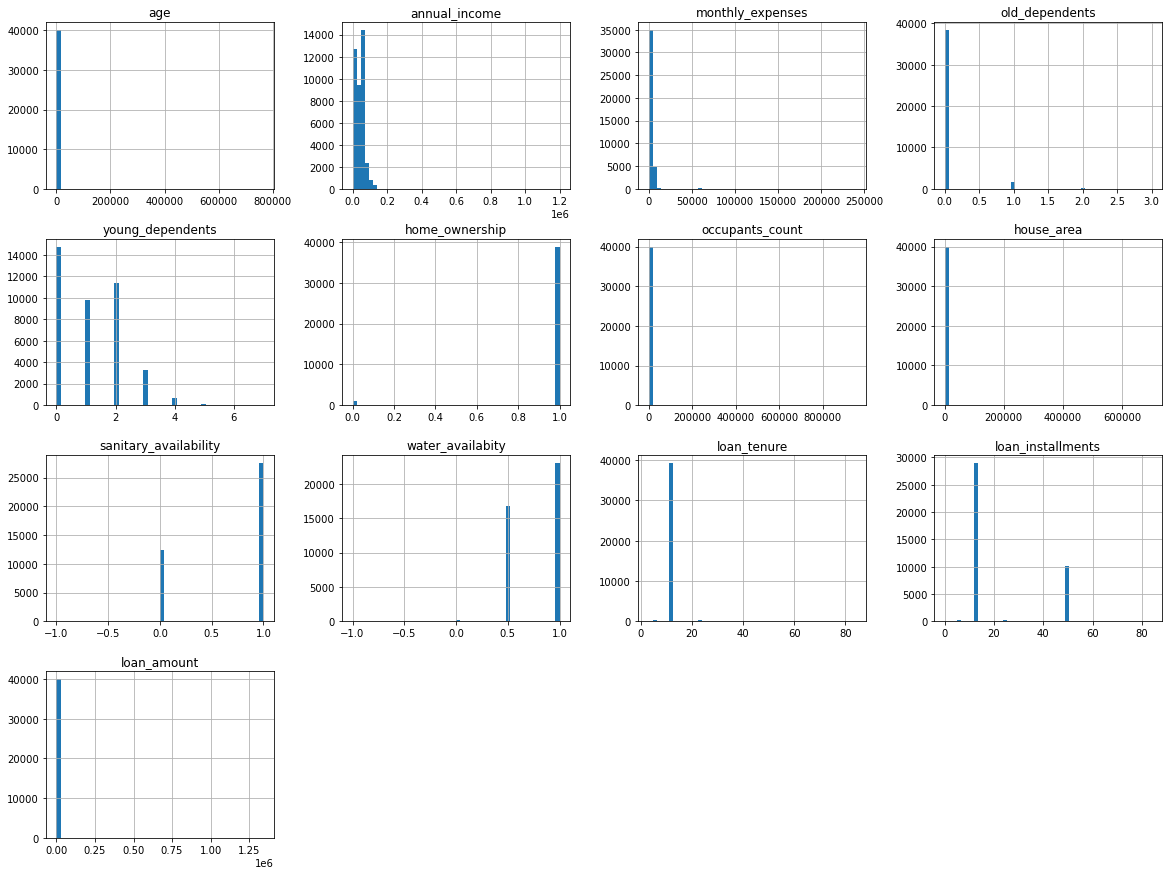

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

##### Data it too much skewed we have to work on output variable (dependent variable).

#### Splitting data into features and target  

In [9]:
X = df.loc[:, df.columns != 'loan_amount']
y = df.loc[:, 'loan_amount']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments
8451,Pusad,40,F,OBC,Fancy Store,none,0.0,3200.0,0,0,1.0,T1,0,0.0,0.0,1.0,Retail Store,12,12
28293,Imphal,36,F,OBC,School,none,36000.0,1500.0,0,2,1.0,T2,6,1800.0,1.0,0.5,Education Loan,12,12
9948,Nuapada,36,F,OBC,Vegetable vendor,none,0.0,4000.0,0,0,1.0,T1,0,0.0,0.0,1.0,Agro Based Businesses,12,12
32270,Balasore,36,F,General,Poultry farm,Others,50400.0,4000.0,0,2,1.0,T2,4,280.0,1.0,1.0,Meat Businesses,12,12
39564,Imphal,38,F,OBC,Weaver,none,48000.0,1000.0,0,3,1.0,T2,5,1600.0,1.0,0.5,Apparels,12,12


In [12]:
y_train

8451      5000.0
28293     7000.0
9948      3000.0
32270    10000.0
39564     8000.0
          ...   
6265      5000.0
11284     5000.0
38158    10000.0
860       5000.0
15795     8000.0
Name: loan_amount, Length: 26800, dtype: float64

In [13]:
### Displaying columns of object data types & the count of unique value each have :
X_train.select_dtypes(include='object').nunique().sort_values()

sex                     3
type_of_house           3
secondary_business      5
loan_purpose           36
primary_business      387
social_class          428
city                  749
dtype: int64

#####  'sex', 'type_of_house', 'secondary_business' are nominal variables with low cardinality so we can use one-hot encoding to convert from categorical to numeric.

In [14]:
X_train = pd.get_dummies(X_train, columns=["sex", "type_of_house", "secondary_business"], 
                         prefix=["gender", "house_type", "sec_business"],drop_first=True)

In [15]:
X_train.head()

,city,age,social_class,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,...,loan_tenure,loan_installments,gender_M,gender_TG,house_type_T1,house_type_T2,sec_business_Daily wage labourer,sec_business_Livestock rearing,sec_business_Others,sec_business_none
8451,Pusad,40,OBC,Fancy Store,0.0,3200.0,0,0,1.0,0,...,12,12,0,0,1,0,0,0,0,1
28293,Imphal,36,OBC,School,36000.0,1500.0,0,2,1.0,6,...,12,12,0,0,0,1,0,0,0,1
9948,Nuapada,36,OBC,Vegetable vendor,0.0,4000.0,0,0,1.0,0,...,12,12,0,0,1,0,0,0,0,1
32270,Balasore,36,General,Poultry farm,50400.0,4000.0,0,2,1.0,4,...,12,12,0,0,0,1,0,0,1,0
39564,Imphal,38,OBC,Weaver,48000.0,1000.0,0,3,1.0,5,...,12,12,0,0,0,1,0,0,0,1


In [16]:
X_train.columns

Index(['city', 'age', 'social_class', 'primary_business', 'annual_income',
       'monthly_expenses', 'old_dependents', 'young_dependents',
       'home_ownership', 'occupants_count', 'house_area',
       'sanitary_availability', 'water_availabity', 'loan_purpose',
       'loan_tenure', 'loan_installments', 'gender_M', 'gender_TG',
       'house_type_T1', 'house_type_T2', 'sec_business_Daily wage labourer',
       'sec_business_Livestock rearing', 'sec_business_Others',
       'sec_business_none'],
      dtype='object')

##### Since the remaining categorical columns are highly cardinal in nature, We make use of hashing & frequency encoding to encode the variables.

In [17]:
## High  cardinal columns frequency mapping 
HCC=['loan_purpose','primary_business','social_class','city']
for i in HCC:
    xx=X_train[i].value_counts()/len(X_train)
    X_train[i]=X_train[i].map(xx)

In [18]:
X_train.head()

,city,age,social_class,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,...,loan_tenure,loan_installments,gender_M,gender_TG,house_type_T1,house_type_T2,sec_business_Daily wage labourer,sec_business_Livestock rearing,sec_business_Others,sec_business_none
8451,0.124216,40,0.398619,0.001978,0.0,3200.0,0,0,1.0,0,...,12,12,0,0,1,0,0,0,0,1
28293,0.043582,36,0.398619,0.033955,36000.0,1500.0,0,2,1.0,6,...,12,12,0,0,0,1,0,0,0,1
9948,0.020672,36,0.398619,0.030261,0.0,4000.0,0,0,1.0,0,...,12,12,0,0,1,0,0,0,0,1
32270,0.014142,36,0.057463,0.018582,50400.0,4000.0,0,2,1.0,4,...,12,12,0,0,0,1,0,0,1,0
39564,0.043582,38,0.398619,0.029216,48000.0,1000.0,0,3,1.0,5,...,12,12,0,0,0,1,0,0,0,1


In [19]:
X_train['city']

8451     0.124216
28293    0.043582
9948     0.020672
32270    0.014142
39564    0.043582
           ...   
6265     0.000485
11284    0.000261
38158    0.000299
860      0.001604
15795    0.043582
Name: city, Length: 26800, dtype: float64

### Finding the Nature of target variable

In [20]:
y_train.describe()

count    2.680000e+04
mean     8.413123e+03
std      1.361398e+04
min      2.000000e+02
25%      5.000000e+03
50%      8.000000e+03
75%      1.000000e+04
max      1.343000e+06
Name: loan_amount, dtype: float64

<AxesSubplot:xlabel='loan_amount'>

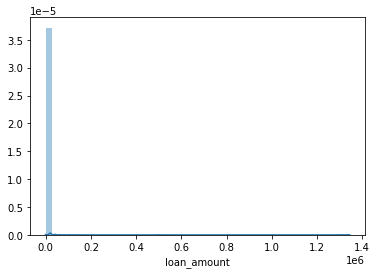

In [21]:
sns.distplot(y_train)

<AxesSubplot:xlabel='loan_amount'>

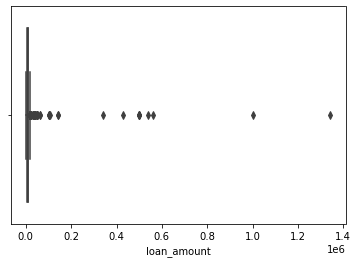

In [22]:
sns.boxplot(y_train)

In [23]:
#### we can clearly see there are few outlier removing these outliers 
#### Removing outliers

In [24]:
q1,q2,q3=np.percentile(y_train, [25, 50, 75])
print(q1,q2,q3)
iqr_value=q3-q1
lower_bond_value=q1-(1.5*iqr_value)
upper_bond_value=q3+(4*iqr_value)
print(lower_bond_value)
print(upper_bond_value)

5000.0 8000.0 10000.0
-2500.0
30000.0


In [25]:
index_to_drop=y_train[y_train>upper_bond_value].index
## we have to drop values having these index from both x_train and y_train

In [26]:
X_train.drop(index_to_drop,axis=0,inplace=True)

In [27]:
y_train.drop(index_to_drop,axis=0,inplace=True)

<AxesSubplot:xlabel='loan_amount'>

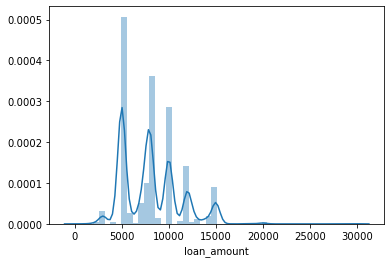

In [28]:
sns.distplot(y_train)

In [29]:
print("Skewness: %f" % y_train.skew())

Skewness: 0.781063


* If skewness is not close to zero, then your data set is not normally distributed.
* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

#### The target variable is positively skewed with a mean value close to 8400, we will have to apply transformation to convert it to near normal distribution.

Skewness: -0.159811


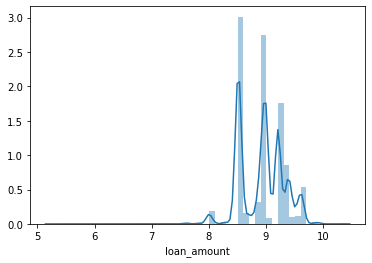

In [30]:
y_train_n1 = np.log(y_train)
sns.distplot(y_train_n1)
print("Skewness: %f" % y_train_n1.skew())

##### We have successfully brought down the skew value from - 0.159 so the distribution is almost normal.

#### Joining X_train and y_train again to check the correlation.

In [31]:
train_df=pd.concat([X_train,pd.DataFrame(y_train_n1,columns=['loan_amount'])],axis=1)
train_df

,city,age,social_class,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,...,loan_installments,gender_M,gender_TG,house_type_T1,house_type_T2,sec_business_Daily wage labourer,sec_business_Livestock rearing,sec_business_Others,sec_business_none,loan_amount
8451,0.124216,40,0.398619,0.001978,0.0,3200.0,0,0,1.0,0,...,12,0,0,1,0,0,0,0,1,8.517193
28293,0.043582,36,0.398619,0.033955,36000.0,1500.0,0,2,1.0,6,...,12,0,0,0,1,0,0,0,1,8.853665
9948,0.020672,36,0.398619,0.030261,0.0,4000.0,0,0,1.0,0,...,12,0,0,1,0,0,0,0,1,8.006368
32270,0.014142,36,0.057463,0.018582,50400.0,4000.0,0,2,1.0,4,...,12,0,0,0,1,0,0,1,0,9.210340
39564,0.043582,38,0.398619,0.029216,48000.0,1000.0,0,3,1.0,5,...,12,0,0,0,1,0,0,0,1,8.987197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.000485,33,0.077612,0.100560,24000.0,5500.0,0,4,1.0,6,...,12,0,0,0,1,0,0,0,1,8.517193
11284,0.000261,32,0.398619,0.016791,0.0,3000.0,0,0,1.0,0,...,12,0,0,1,0,0,0,0,1,8.517193
38158,0.000299,20,0.065336,0.018582,38000.0,1130.0,0,1,1.0,3,...,12,0,0,1,0,0,0,0,0,9.210340
860,0.001604,24,0.398619,0.024925,80000.0,2000.0,0,2,1.0,3,...,12,0,0,0,1,0,0,0,1,8.517193


In [32]:
corr1=train_df.corr()['loan_amount'].sort_values(ascending=False)[:10]
corr1

loan_amount              1.000000
annual_income            0.346874
city                     0.195214
sanitary_availability    0.180219
young_dependents         0.142007
loan_installments        0.129590
water_availabity         0.119415
loan_tenure              0.104476
house_area               0.075138
sec_business_none        0.062164
Name: loan_amount, dtype: float64

<AxesSubplot:>

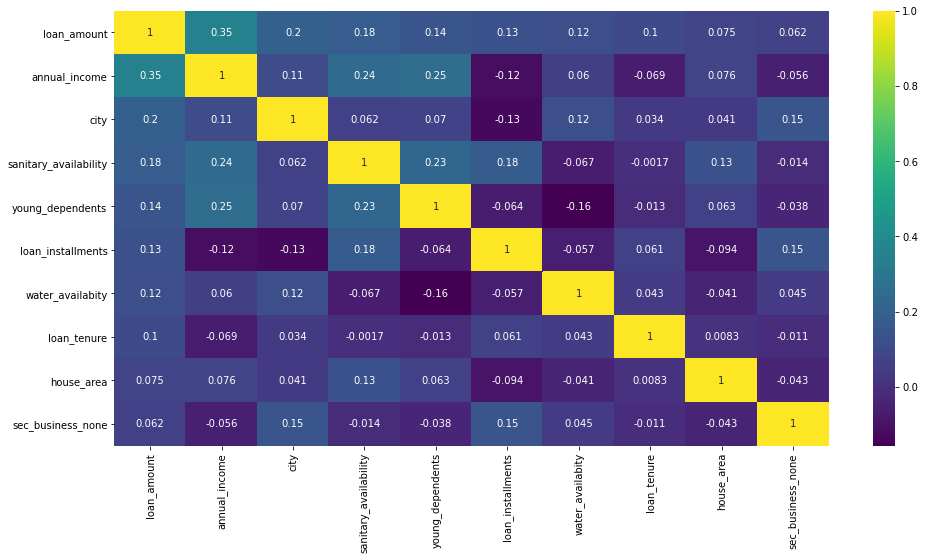

In [33]:
corr2=train_df[corr1.index].corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr2,annot=True,cmap = 'viridis')

###  Removing Multicolinearity using VIF
* VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
* VIF score of an independent variable represents how well the variable is explained by other independent variables.
* R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables. This is captured by the VIF which is denoted below:
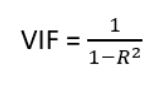
* So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.
* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others
* https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

In [34]:
vif = [VIF(X_train.values, i) for i in range(X_train.shape[1])]
print(vif)

[1.9935167436401584, 1.000613512282545, 2.5143751718370333, 3.629300384534649, 3.4270420929187595, 1.8080093327489732, 1.0816040667246054, 2.515659232661537, 29.83849705496447, 1.001245421265624, 1.2327859995911146, 3.9949796462790035, 11.523547851722755, 7.741558965561885, 50.29986627491661, 3.6653506634758806, 1.1510790783447655, 1.0005464121919823, 3.4581226531315417, 4.168077170554456, 2.21789450644792, 1.079029334134501, 2.2475808158562445, 15.718078472834943]


In [35]:
vif_df=pd.Series(vif,index=X_train.columns)
print(vif_df)
multi_coliner_f=vif_df[vif_df>=5].index.tolist()
multi_coliner_f

city                                 1.993517
age                                  1.000614
social_class                         2.514375
primary_business                     3.629300
annual_income                        3.427042
monthly_expenses                     1.808009
old_dependents                       1.081604
young_dependents                     2.515659
home_ownership                      29.838497
occupants_count                      1.001245
house_area                           1.232786
sanitary_availability                3.994980
water_availabity                    11.523548
loan_purpose                         7.741559
loan_tenure                         50.299866
loan_installments                    3.665351
gender_M                             1.151079
gender_TG                            1.000546
house_type_T1                        3.458123
house_type_T2                        4.168077
sec_business_Daily wage labourer     2.217895
sec_business_Livestock rearing    

['home_ownership',
 'water_availabity',
 'loan_purpose',
 'loan_tenure',
 'sec_business_none']

In [36]:
# If there had been multicolineary we have had to drop those columns as given below
X_train.drop(multi_coliner_f,inplace=True,axis=1)

#### Normalizing the data

In [37]:
X_train_normalized = (X_train - X_train.mean())/X_train.std()

In [38]:
len(X_train_normalized.columns)

19

#### Making Fuction so that test set can be prepared before feeding into model for prediction

In [39]:
def test_set_Prepare(x_test):
    x_test = pd.get_dummies(x_test, columns=["sex", "type_of_house", "secondary_business"], 
                         prefix=["gender", "house_type", "sec_business"],drop_first=True)
## High  cardinal columns frequency mapping 
    HCC=['loan_purpose','primary_business','social_class','city']
    for i in HCC:
        xx=x_test[i].value_counts()/len(x_test)
        x_test[i]=x_test[i].map(xx)
    multi_coliner_f=['home_ownership', 'water_availabity','loan_purpose','loan_tenure', 'sec_business_none']
    x_test.drop(multi_coliner_f,inplace=True,axis=1)
    x_test = (x_test - X_train.mean())/X_train.std()
    return x_test

In [40]:
x_test_prepared=test_set_Prepare(X_test)

In [41]:
x_test_prepared.shape

(13200, 19)

#### Transformation of y_test by taking log:

In [42]:
y_test_n1=np.log(y_test)
y_test_n1.values

array([8.85366543, 8.9226583 , 8.98719682, ..., 9.21034037, 9.21034037,
       8.51719319])

In [43]:
from sklearn.linear_model import LinearRegression as lr
reg = lr()

In [44]:
reg.fit(X_train_normalized, y_train_n1)

LinearRegression()

In [45]:
y_pred=reg.predict(x_test_prepared)
y_pred

array([8.88806081, 8.87712157, 9.18177259, ..., 8.99761893, 8.97726894,
       9.36170052])

In [46]:
## Making functions for checking accuracy

In [47]:
from sklearn import metrics
def Accuracy(y_test,y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [48]:
Accuracy(y_test_n1,y_pred)

Mean Absolute Error: 0.2703192962012879
Mean Squared Error: 0.1428886891807181
Root Mean Squared Error: 0.3780062025691088


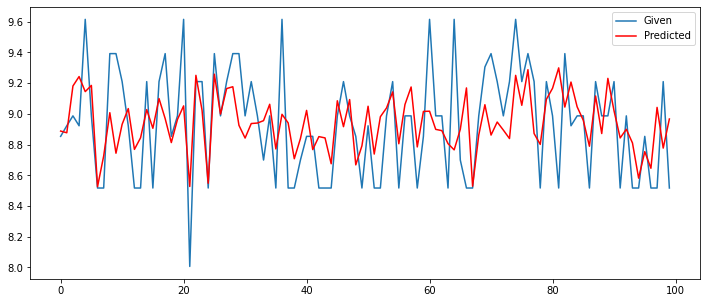

In [49]:
## Plotting first 100 values for both given and predicted values and comparing
plt.figure(figsize=(12,5))
x=np.arange(len(y_test_n1[:100]))
plt.plot(x,y_test_n1[:100],label='Given')
plt.plot(x,y_pred[:100],c='r',label='Predicted')
plt.legend()
plt.show()


#### Convering back the y_pred to its original scale and  comparing with original y_test value.

In [50]:
y_pred_scale_back=np.exp(y_pred)
y_pred_scale_back

array([ 7244.95622844,  7166.13377976,  9718.36419341, ...,
        8083.81288522,  7920.96990058, 11634.15580116])

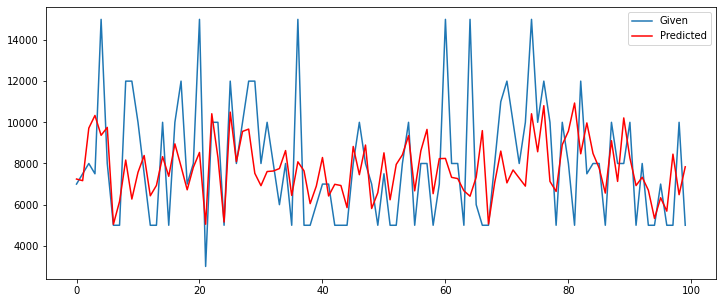

In [51]:
plt.figure(figsize=(12,5))
x=np.arange(len(y_test[:100]))
plt.plot(x,y_test[:100],label='Given')
plt.plot(x,y_pred_scale_back[:100],c='r',label='Predicted')
plt.legend()
plt.show()